# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import json
import warnings

warnings.filterwarnings('ignore')

C:\Users\Ife\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
twt_arch_raw = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
df_image_raw = pd.read_csv('image_predictions.tsv' , sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
twt_js_raw = pd.read_json('tweet_json.txt', lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 
**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
# To make sure that the all columns are displayed
pd.set_option('max_columns', None)

### Starting with the twitter archive

In [6]:
# Display the first five rows for assessment
twt_arch_raw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> At first glance it can be seen that there are a number of columns with lots of NAN values and also there are tweets with 'None' in columns doggo ,fluffo, puppo, pupper (i.e having 'None' values all through), thereby leaving no indication of dog stage

In [7]:
# Display the last five rows for assessment
twt_arch_raw.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


> There are some 'None' dog names and a couple of dogs having name 'a' 

In [8]:
# Display five columns from the dataframe at random
twt_arch_raw.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1398,699775878809702401,NaN,NaN,2016-02-17 02:02:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fillup. Spaghetti is his main weakness. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699775878...,11,10,Fillup,None,None,None,None
1827,676430933382295552,NaN,NaN,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Duke. He's an Urban Parmesan. They know h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676430933...,10,10,Duke,None,None,None,None
1801,676957860086095872,NaN,NaN,2015-12-16 02:51:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10/10 I'd follow this dog into battle no quest...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676957860...,10,10,None,None,None,None,None
1879,675015141583413248,NaN,NaN,2015-12-10 18:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moe. He's a golden Fetty Woof. Doesn't re...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675015141...,10,10,Moe,None,None,None,None
934,753420520834629632,NaN,NaN,2016-07-14 02:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing an isolated squad of bo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753420520...,11,10,None,None,None,None,None


> Still a lot on None values and Nan all over the dataset

> The tweet sources in the source column are buried in jargons and not clearly stated

### Now to dig a little deeper into the dataset programmatically

Let's begin with the tweet source column

In [9]:
# To check the various tweet sources in the dataset
twt_arch_raw['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

So there are four distinct tweet sources

> Let's explore the various data types and the amount of missing data in each column of the dataset 

In [10]:
# Display info about the dataset including the number of null values in each column 
twt_arch_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

It can be seen that there are 181 retweets in this archive as indicated by the number of retweeted status id
and there are a lot of null values in this dataset

In [11]:
# To check the various data types in each column of the twitter archive dataset
twt_arch_raw.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Now to check the number of duplicated rows

In [12]:
twt_arch_raw.duplicated().sum()

0

There are no duplicated rows

> Now let's take a look at the twitter archive dataset in terms of numbers 

In [13]:
twt_arch_raw.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


There exist rating numerator and denominator of 0 as indicated by the min role on the above table

In [14]:
# To check these roles 
twt_arch_raw.query('rating_numerator == 0 | rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [15]:
twt_arch_raw[twt_arch_raw['rating_denominator'] < 10 ]['tweet_id'].count()

3

In [16]:
# To check if some of the numerator are less than 10
twt_arch_raw.query('rating_numerator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


The maximum values for rating denominator and numerator look abnormal, it needs further investigation

In [17]:
twt_arch_raw['rating_numerator'].sort_values(ascending=False).head(20)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
Name: rating_numerator, dtype: int64

In [18]:
twt_arch_raw['rating_denominator'].sort_values(ascending=False).head(20)

1120    170
902     150
1634    130
1779    120
1635    110
1228     90
1254     80
1843     80
433      70
1274     50
1351     50
1202     50
1433     40
1598     20
1165     20
1663     16
342      15
1662     11
1068     11
784      11
Name: rating_denominator, dtype: int64

In [19]:
# The number of denominators  greater than 10 in this dataset
twt_arch_raw[twt_arch_raw['rating_denominator'] > 10 ]['tweet_id'].count() 

20

> Now to explore the doggo , puppo, pupper, floofer columns (all referring to the dog stages)

In [20]:
# creating a dataframe of the various dog stage columns for the purpose of exploration
dog_stages = twt_arch_raw[['doggo', 'floofer', 'pupper' , 'puppo']] 

In [21]:
# To check the unique values in these columns 
dog_stages.value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  floofer  None    None        1
       None     None    puppo       1
dtype: int64

Some rows have more than one dog stage

### The Image Dataset

First a quick view of the dataset

In [22]:
# A view of the first five rows
df_image_raw.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


looks good enough

In [23]:
# A view of the last five rows in the dataset
df_image_raw.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


Some urls contain more than one picture

In [24]:
# A view of a random five rows from the dataset
df_image_raw.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1189,739606147276148736,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg,3,Blenheim_spaniel,0.933755,True,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True
450,674739953134403584,https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg,1,Dandie_Dinmont,0.175915,True,black-footed_ferret,0.096534,False,toy_poodle,0.064145,True
139,668542336805281792,https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg,1,American_Staffordshire_terrier,0.267695,True,French_bulldog,0.254050,True,Staffordshire_bullterrier,0.212381,True
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
1969,868622495443632128,https://pbs.twimg.com/media/DA33i0XXsAEQtCA.jpg,1,Labrador_retriever,0.868107,True,Great_Pyrenees,0.060973,True,Saint_Bernard,0.033489,True


The names of the dogs are separated with underscores instead of whitespace and the rest of the data seems consistent enough

Let's get some insights into how much missing data is present in this dataset

In [25]:
df_image_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> There are no missing data whatsoever

In [26]:
# To check the datatypes of the columns in the dataset
df_image_raw.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

The datatypes are in order

In [27]:
# To see if there are any duplicated tweet id
df_image_raw['tweet_id'].duplicated().all()

False

In [28]:
df_image_raw.query('img_num > 1').count()

tweet_id    295
jpg_url     295
img_num     295
p1          295
p1_conf     295
p1_dog      295
p2          295
p2_conf     295
p2_dog      295
p3          295
p3_conf     295
p3_dog      295
dtype: int64

### The supplementary twitter json dataset

In [29]:
# To view a snap shot of the first five rows of the twitter json dataset
twt_js_raw.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,4328,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8964,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,9774,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


There's a column id_str that is just incorrect and not useful

In [30]:
# To check for any missing values 
twt_js_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

Many of these columns won't be used because they don't offer any meaningful information for my analysis

There is a whole lot of missing values in many of these columns 

In [31]:
# To check if there are any duplicated tweet id
twt_js_raw['id'].duplicated().all()

False

### Quality issues

> #### Twitter Archive

1. A lot of missing values in the dataset including rows that have no indication of dog stage

2. Data types are not appropriate (the timestamp column) 

3. The tweet sources in the source column are buried in jargons and not clearly stated

4. The presence of zero rating in the rating denominator and numerator columns

5. Some rating in the denominator are greater than 10 and there are some less than 10

6. There are ratings in the denominator that are less than 10

7. Some rows have more than one dog stage

8. Retweets in the archive

> #### Image

1. Underscore instead of whitespace in the tyoe of dog predicted

2. Inappropriate datatype for the tweet_id column

> #### Twitter j_son dataset

1. A lot of missing data and a lot of columns to drop

2. Inappropriate datatype for the id column


### Tidiness issues
1. The doggo , puppo, floofer, pupper columns should be one column dog stage

2. The three dataset should be a combined dataset

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
twt_arch_clean = twt_arch_raw.copy()
df_img_clean = df_image_raw.copy()
twt_js_clean = twt_js_raw.copy()

###  #1: Twitter archive 

#### Rows with more than one dog stage 
#### Rows with zero as denominator or numerator
#### Rows with dog name a
#### Rows with containing retweets

#### Define:
Get the index for these rows and proceed to drop them

#### Code

In [33]:
# The number of rows and columns in the dataset
twt_arch_clean.shape

(2356, 17)

In [34]:
# The function to carry out these steps
def drop_twt_arch_rows(dataframe, the_query):
    """ Takes in the dataframe to act on, the query, a list of queries containing
    the conditional statement to pick the rows of interest
    and then proceeds to drop them"""
    # for loop to iterate over the list of query
    for q in the_query:
        # Get the index of this rows
        index_to_drop = dataframe.query(q).index
        # Drop these rows
        dataframe = dataframe.drop(index_to_drop)
    
    return dataframe

In [35]:
# The various queries
pupper_and_doggo = 'pupper == "pupper" & doggo == "doggo"'
floofer_and_doggo = 'floofer == "floofer" & doggo == "doggo"'
zero_numerator = 'rating_numerator == 0'
name_a = 'name == "a"'
retweets = 'retweeted_status_id != "nan"'

# The query list
the_query_list = [pupper_and_doggo, floofer_and_doggo, zero_numerator, name_a, retweets]

In [36]:
# Drop the rows with the function 
twt_arch_clean1 = drop_twt_arch_rows(twt_arch_clean, the_query_list)

#### Test

In [37]:
# Using a function to test if these intances still remain
def check_drop(dataframe, the_query):
    """ Takes in the dataframe to act on, the query, a list of queries containing
    the conditional statement to pick the rows of interest
    and then returns the number of instances"""    
    for q in the_query:

        print(q + '--------number of instances left is ' + str(dataframe.query(q).count()[0]) )

# Call the function
check_drop(twt_arch_clean1, the_query_list)

pupper == "pupper" & doggo == "doggo"--------number of instances left is 0
floofer == "floofer" & doggo == "doggo"--------number of instances left is 0
rating_numerator == 0--------number of instances left is 0
name == "a"--------number of instances left is 0
retweeted_status_id != "nan"--------number of instances left is 0


In [38]:
# check for a reduction in the dataset
twt_arch_clean1.shape

(2107, 17)

These rows have been dropped as displayed by the reduction in the rows in the dataset

### The tweet sources in the source column are buried in jargons and not clearly stated

#### Define:
 Clean the source column


#### Code

In [39]:
# Code to replace the values in the source column with clear info
twt_arch_clean2 = twt_arch_clean1.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
                   '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                   '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
                   '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'})

#### Test

In [40]:
# The first five rows in the dataset
twt_arch_clean2.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

The changes seem to have been made but we can confirm by checking for all the unique values in the source column

In [41]:
# Check the unique values in the datset
twt_arch_clean2.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### The columns doggo, floofer, puppo and pupper should be one column

#### Define:
Combine these columns to produce one column **dog_stage** and then drop them

In [42]:
# Resetting the index of the dataframe
twt_arch_clean3 = twt_arch_clean2.reset_index()

In [43]:
# The function to get the new column 
def undummify(df, column_list, dummy_value):
    """This function takes in a dataframe and a list of dummy columns and dummy values (e.g None) and 
    returns a single list with the appropriate values """
    undummified = []
    for ind in df[column_list].index:
        if len(df[column_list].iloc[ind].unique()) == 1:
            undummified.append(dummy_value)
        else:
            for i in df[column_list].iloc[ind].unique():
                if i != dummy_value:
                    undummified.append(i)
                else:
                    pass
                
    return undummified   

In [44]:
# Calling the funtion
correct_dog_stage = pd.Series(undummify(twt_arch_clean3,['doggo','floofer','pupper','puppo'], 'None'))

Dropping the columns and adding the new columns using another function

In [45]:
def add_dog_name(df , col_drop_list, new_col_value, new_col_name):
    """ This function drops some columns and adds a new column with a predefined panda series or list
    the col_drop_list is the list of columns to drop
    new_col is the new column to be added (pass a pd.Series or list object)
    new_col_name is the name (pass a string) of of the new column to be added"""

    # dropping the columns
    df = df.drop(columns=col_drop_list, axis=1)
    
    # Adding the new column
    df[new_col_name] = new_col_value
    
    return df #returns a view of the data 

In [46]:
# Applying the add_dog_name function
twt_arch_clean3 = add_dog_name(twt_arch_clean3, ['doggo','floofer','pupper','puppo'], correct_dog_stage, 'dog_stage')

#### Test

In [47]:
# view of the column names 
twt_arch_clean3.columns

Index(['index', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage'],
      dtype='object')

In [48]:
# Check for a reduction in the number of columns in the dataset
twt_arch_clean3.shape

(2107, 15)

### Columns and rows to be dropped

#### Define:
Drop the columns 
1. in_reply_to_status_id
2. in_reply_to_user_id
3. retweeted_status_id
4. retweeted_status_user_id
5. retweeted_status_timestamp
6. rating_denominator
7. name (Too many missing names)

Drop rows with **None** in the **dog_stage** column

#### Code

In [49]:
# List of columns to drop
col_to_drop = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
               'retweeted_status_user_id','retweeted_status_timestamp','rating_denominator', 'name']

In [50]:
# Dropping these columns
twt_arch_clean4 = twt_arch_clean3.drop(columns = col_to_drop, axis=1)

Get the index of columns that have None as dog_stage

In [51]:
# Get the index of these rows
none_dog_stage = twt_arch_clean4.query('dog_stage == "None"').index

In [52]:
# Drop these rows using the index from above
twt_arch_clean4 = twt_arch_clean4.drop(none_dog_stage)

#### Test

In [53]:
# Check the first two rows of the dataset
twt_arch_clean4.head(2)

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,dog_stage
9,9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,doggo
12,12,889665388333682689,2017-07-25 01:55:32 +0000,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,puppo


In [54]:
# Check for all instances of dog stage in the dog_stage column
twt_arch_clean4.dog_stage.unique()

array(['doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### Wrong Datatype

#### Define:
1. Change timestamp column to datetime
2. Change the tweet_id column to string
3. Change the dog_stage and source column to categorical data

#### Code

Resetting the and creating a new copy of the dataset before making more changes

In [55]:
twt_arch_clean5 = twt_arch_clean4.reset_index()

In [56]:
# To date time
twt_arch_clean5['timestamp'] = pd.to_datetime(twt_arch_clean5['timestamp'])

# To string
twt_arch_clean5['tweet_id'] = twt_arch_clean5['tweet_id'].astype('string')

# To Categorical
twt_arch_clean5['dog_stage'] = pd.Categorical(twt_arch_clean5.dog_stage)
twt_arch_clean5['source'] = pd.Categorical(twt_arch_clean5.source)

#### Test

In [57]:
# View of the datatypes of each column to confirm the changes 
twt_arch_clean5.dtypes

level_0                           int64
index                             int64
tweet_id                         string
timestamp           datetime64[ns, UTC]
source                         category
text                             object
expanded_urls                    object
rating_numerator                  int64
dog_stage                      category
dtype: object

The end of the cleaning process for that twitter archive dataset , here is the final dataset and the number of rows and columns 

In [58]:
# Remove the unwanted columns index and level_0
twt_arch_final = twt_arch_clean5.drop(columns = ['level_0', 'index'])
twt_arch_final.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,dog_stage
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,doggo
1,889665388333682689,2017-07-25 01:55:32+00:00,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,puppo


In [59]:
# The new number of rows and columns
twt_arch_final.shape

(330, 7)

## #2: Cleaning the Image Dataset

### Columns that are not needed

#### Define:
Only the columns tweet_id, jpg_url, p1 wil be kept

#### Code

In [60]:
# Making a new dataframe with just these columns
df_img_clean1 = df_img_clean[['tweet_id', 'jpg_url', 'p1']]

#### Test

In [61]:
# A view of the dataset
df_img_clean1.head(3)

,tweet_id,jpg_url,p1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd


### The underscore in the column p1

#### Define:
1. Remove the underscores in the p1 column
2. Rename the p1 column name to dog_breed

#### Code

In [62]:
# Creating a copy of the dataset to save changes
df_img_clean2 = df_img_clean1.copy()
# Code to remove the underscore in the p1 column and replacing it with whitespace

df_img_clean2['p1'] = df_img_clean2.p1.str.replace('_', ' ')


Change the colun name p1 to dog_breed

In [63]:
df_img_clean2.rename(columns={'p1':'dog_breed'}, inplace=True)

#### Test

In [64]:
# A view of the first three rows 
df_img_clean2.head(3)

,tweet_id,jpg_url,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd


### Inappropriate datatype

#### Define:
Change the tweet_id column to **strings** from **int**

#### Code

In [65]:
# Change datatpe to string
df_img_clean2.tweet_id = df_img_clean2.tweet_id.astype('string')

#### Test

In [66]:
# A view of the first three rows 
df_img_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2075 non-null   string
 1   jpg_url    2075 non-null   object
 2   dog_breed  2075 non-null   object
dtypes: object(2), string(1)
memory usage: 48.8+ KB


In [67]:
# Present the final image dataset
df_img_final = df_img_clean2.copy()

## #3: The Tweet json Dataset

#### Columns that are not needed for this analysis

#### Define:
Keep only three columns , the **id**, **retweet_count** and the **favorite_count** columns

#### Code 

In [68]:
# Creating a new copy of the dataset with only these columns 
twt_js_clean1 = twt_js_clean[['id', 'retweet_count','favorite_count']]

#### Test

In [69]:
# View of the first 2 rows
twt_js_clean1.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


### Inappropriate datatype

#### Define:
Change the datatype of the id column from int to string 

#### Code

In [70]:
# A copy to make changes on 
twt_js_clean2 = twt_js_clean1.copy()

# Change the datatype to string
twt_js_clean2.id = twt_js_clean2.id.astype('string')

#### Test

In [71]:
# Check for the datatype of the id column
twt_js_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   string
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 55.3 KB


In [72]:
# A Copy of the final form of the dataset
twt_js_final = twt_js_clean2.copy()

## Merging the three dataset to form one master dataset

### First Merge

#### Define:
Merge the twt_arch_final and df_img_final on tweet_id

#### Code

In [73]:
merge_1 = twt_arch_final.merge(df_img_final, on='tweet_id')

#### Test

In [74]:
# Check for changes
list(merge_1)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'dog_stage',
 'jpg_url',
 'dog_breed']

The **dog_breed** and **jpg_url** columns has been added to the dataset 

### Second Merge

#### Define:
Merge the merge_1 dataset with the twt_js_final dataset on tweet_id and id

#### Code

In [75]:
# Merge using the tweet_id column on merge_1 and the id column on the twt_js_final 
merge_2 = merge_1.merge(twt_js_final, left_on='tweet_id', right_on='id')

#### Test

In [76]:
# Check the list of columns in merge_2
list(merge_2)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'dog_stage',
 'jpg_url',
 'dog_breed',
 'id',
 'retweet_count',
 'favorite_count']

The column **id** has to be dropped as it is a replica of the **tweet_id** column

In [77]:
# Dropping the id column and making this new dataset the master lean dataset
twitter_archive_master = merge_2.drop('id', axis=1)

In [78]:
# A list of the columns in the dataset
list(twitter_archive_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'dog_stage',
 'jpg_url',
 'dog_breed',
 'retweet_count',
 'favorite_count']

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [79]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [81]:
# Loading the twitter_archive_master as a dataframe
twt_arch_ms = pd.read_csv('twitter_archive_master.csv')

### Question 1: What are the top 5 most common dog breed

In [82]:
# The code to get this 
breed_count = twt_arch_ms['dog_breed'].value_counts()[:5]

# Print the list of top 5 dog_breed
breed_count

golden retriever      24
Labrador retriever    15
Chihuahua             13
pug                   12
toy poodle            10
Name: dog_breed, dtype: int64

Above is the list of the **Top 5 Dog Breeds**

### Question 2: What is the relationship between favourite count and retweet count

This relationship would be explored with the help of a scatter plot

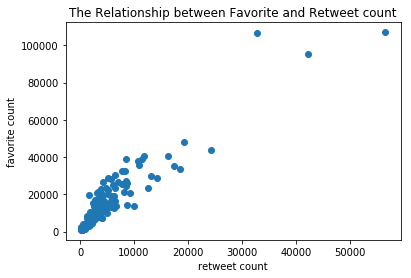

In [85]:
# The code to plot this 
plt.scatter(twt_arch_ms['retweet_count'], twt_arch_ms['favorite_count']);
plt.title('The Relationship between Favorite and Retweet count')
plt.xlabel('retweet count')
plt.ylabel('favorite count')
plt.show();

There seems to be a correlation between favourite and retweet count

Basically,  the more the retweet , the more the favorite count

### Question 3: Informatiom about the highest rating in the dataset

In [86]:
# Get the maximum rating
max_rating = twt_arch_ms.rating_numerator.max()

In [87]:
# A view of some info about the maximum rating in the dataset
twt_arch_ms[twt_arch_ms['rating_numerator'] == max_rating][['dog_breed', 'dog_stage', 'rating_numerator']]

,dog_breed,dog_stage,rating_numerator
164,Siberian husky,pupper,50


### Question 4: What dog stages have the most favorite count

In [89]:
# Group the data by dog stage
stage = twt_arch_ms.groupby('dog_stage')

In [88]:
# Function to plot the graph
def plot_avg_fav(df):
    fav_avg = []
    stages = []
    for i in twt_arch_ms['dog_stage'].unique():
        fav_avg.append(stage.get_group(i)['favorite_count'].mean())
        stages.append(i)
    
    plt.bar(stages, fav_avg);
    
    plt.title('Average Favorite Count per dog stage')
    plt.xlabel('Dog stage')
    plt.ylabel('Average Favorite Count')
    
    return plt.show()

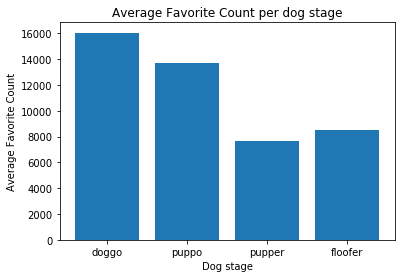

In [90]:
# Code to call the function
plot_avg_fav(stage)

I think I speak for everyone when I say that te graph speaks for itself

### Insights:
1. Dogs in the doggo stage seems to get more favorites and retweets

2. The top five most common dog breeds are golden retriever, Labrador retriever, Chihuahua, pug and toy poodle

3. The dog breed with the highest rating is a Siberian husky at the pupper stage

4. There appears to be a positive correlation between favorite count and retweet count